<a href="https://colab.research.google.com/github/saeedashraf/COVID19_Daily_Prediction/blob/master/COVID19_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID19 prediction of total cases in the comming days based on current situation

In this notebook we try to train a model based on total cases of corona cases and predict the number of total cases in future

## Importing the necessary libraries

We use different libraries : Numpy, Pandas, Scikitlearn, Matplotlib, datetime


In [0]:
!pip install gitpython


     |████████████████████████████████| 460kB 4.9MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import git
import os

In [0]:
print(git.__version__)

3.1.2


In [0]:
print(os.getcwd())

/content


## Cloning the dataset from John Hopkins repository

In [0]:
import git
git.Git("/content/").clone("https://github.com/CSSEGISandData/COVID-19.git")
#git.Git("C:/Users/ashrafse/SA_5_COVID5").origin.pull("https://github.com/CSSEGISandData/COVID-19.git")


''

In [0]:
from shutil import copyfile
import os

source = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
target = '/content/time_series_covid19_confirmed_global.csv'


#source = input("Enter source file with full path: ")
#target = input("Enter target file with full path: ")


copyfile(source, target)

'/content/time_series_covid19_confirmed_global.csv'

#### Reading the data


Set the dataset's rows and columns maximum extent 

In [0]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 10000)

Dataset is read and a filter is defined to capture a specified country.

In [0]:
# Importing the dataset
dataset = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')

xLength = len(dataset.columns) - 4
X = np.arange(xLength)


## Please specify the country's name of which you are interested to see the results in the code below

### Italy, US, China, France, Switzerland, etc
You can choose the name from the code below:

# New Section

In [0]:
dataset['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                                Benin


In [0]:
dataset.head(4)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760


In [0]:
analyzedContry = 'Italy'

filt3 = (dataset['Country/Region'] == analyzedContry)
#y = np.transpose(dataset.loc[filt3, dataset.columns[4:]].values)
y = np.transpose(dataset.loc[filt3, dataset.columns[4:]].apply(pd.Series.sum).values)
#X = dataset.iloc[:, 1:2].values
#y = dataset.iloc[:, 2].values

In [0]:
X.shape

(113,)

In [0]:
y.shape

(113,)

In [0]:
X

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112])

In [0]:
y

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      2,      2,      2,      2,      2,      2,      2,
            3,      3,      3,      3,      3,      3,      3,      3,
            3,      3,      3,      3,      3,      3,     20,     62,
          155,    229,    322,    453,    655,    888,   1128,   1694,
         2036,   2502,   3089,   3858,   4636,   5883,   7375,   9172,
        10149,  12462,  12462,  17660,  21157,  24747,  27980,  31506,
        35713,  41035,  47021,  53578,  59138,  63927,  69176,  74386,
        80589,  86498,  92472,  97689, 101739, 105792, 110574, 115242,
       119827, 124632, 128948, 132547, 135586, 139422, 143626, 147577,
       152271, 156363, 159516, 162488, 165155, 168941, 172434, 175925,
       178972, 181228, 183957, 187327, 189973, 192994, 195351, 197675,
       199414, 201505, 203591, 205463, 207428, 209328, 210717, 211938,
       213013, 214457, 215858, 217185, 218268, 219070, 219814, 221216,
      

## Machine learning algorithms


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
X_train

array([ 43,   8,  78,  82,  60,   3,  90,  59,  33,   6,  94,  50,  85,
        98, 112,  75,  61,  27,  18,  11, 101,  66,  51,  74,  48,   1,
        68,  42,  41,   4,  15,  17,  52,  40,  38,   5,  53, 107,  62,
         0,  34,  28,  55,  35,  23,  31,  73,  57,  86,  96,  32,  95,
        14,  92,  19,  29,  49, 110, 111,  79,  69,  80,  20, 106,  72,
        77,  25,  37,  81,  99,  46, 102,  39,  65,  58,  12, 100,  88,
        70,  87,  36,  21,  83,   9, 103, 109,  67,  64,  47,  44])

In [0]:
X_test

array([105,  10,  24,   7, 108,  56,  63,  76,  26,   2,  91,  45,  54,
        93, 104,  71,  97,  16,  13,  22,  84,  89,  30])

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
#_train = sc_X.fit_transform(X_train.reshape(-1, 1))
#_test = sc_X.transform(X_test)

X_train = sc_X.fit_transform(X_train.reshape(-1, 1))
X_test = sc_X.transform(X_test.reshape(-1, 1))

In [0]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))
poly_reg.fit(X_poly, y.reshape(-1, 1))
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

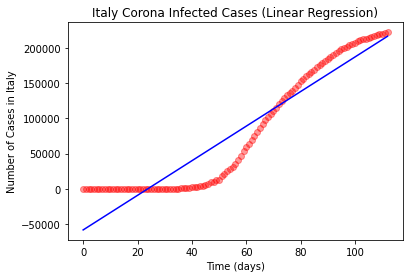

In [0]:
# Visualising the Linear Regression results
plt.scatter(X.reshape(-1, 1), y.reshape(-1, 1), color = 'red', alpha = 0.4)
plt.plot(X.reshape(-1, 1), lin_reg.predict(X.reshape(-1, 1)), color = 'blue')
plt.title('{} Corona Infected Cases (Linear Regression)'.format(analyzedContry))

#plt.figure(figsize=(15, 15))
#plt.xticks(np.arange(xLength), pd.to_datetime(dataset.columns[4:], format ='%m/%d/%y').tolist())

plt.xlabel('Time (days)')
plt.ylabel('Number of Cases in {}'.format(analyzedContry))
plt.show()

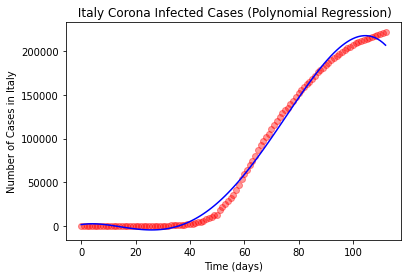

In [0]:
# Visualising the Polynomial Regression results 
# Red dots are actual cases , Blue line is the fitted function
plt.scatter(X.reshape(-1, 1), y.reshape(-1, 1), color = 'red', alpha = 0.4)
plt.plot(X.reshape(-1, 1), lin_reg_2.predict(poly_reg.fit_transform(X.reshape(-1, 1))), color = 'blue')
plt.title(' {} Corona Infected Cases (Polynomial Regression)'.format(analyzedContry))
plt.xlabel('Time (days)' )
plt.ylabel('Number of Cases in {}'.format(analyzedContry))
plt.show()

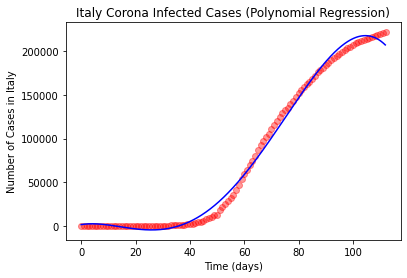

In [0]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
# Red dots are actual cases , Blue line is the fitted function

X_grid = np.arange(min(X.reshape(-1, 1)), max(X.reshape(-1, 1)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X.reshape(-1, 1), y.reshape(-1, 1), color = 'red', alpha = 0.4)
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('{} Corona Infected Cases (Polynomial Regression)'.format(analyzedContry))
plt.xlabel('Time (days)')
plt.ylabel('Number of Cases in {}'.format(analyzedContry))
plt.show()

In [0]:
# Predicting a new result with Linear Regression
lin_reg.predict([[120]])

array([[236020.99547541]])

In [0]:
# Predicting a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform([[120]]))

array([[165395.65478695]])

In [0]:
#Training the Logistic Regression model on the Training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X.reshape(-1, 1), y.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

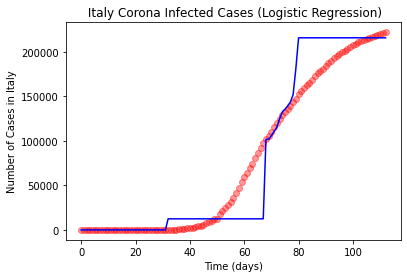

In [0]:
# Visualising the Polynomial Regression results
# Red dots are actual cases , Blue line is the fitted function

plt.scatter(X.reshape(-1, 1), y.reshape(-1, 1), color = 'red', alpha = 0.4)
plt.plot(X.reshape(-1, 1), classifier.predict(X.reshape(-1, 1)), color = 'blue')

plt.title(' {} Corona Infected Cases (Logistic Regression)'.format(analyzedContry))
plt.xlabel('Time (days)' )
plt.ylabel('Number of Cases in {}'.format(analyzedContry))
plt.show()